In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/neurobiases')

# Gaussian Conditions

In [3]:
normal_path = os.path.join(base_path, 'tc_sweep_gaussian.npz')

In [4]:
results = np.load(normal_path)

In [5]:
a_trues = results['a_trues']
b_trues = results['b_trues']
a_hats = results['a_hats']
b_hats = results['b_hats']

In [6]:
n_nz_a = np.unique(np.count_nonzero(a_trues, axis=-1)).item()
n_nz_b = np.unique(np.count_nonzero(b_trues, axis=-1)).item()
n_means, n_models, n_datasets = a_hats.shape[:-1]

In [7]:
a_trues_nz = np.zeros((n_means, n_models, n_nz_a))
b_trues_nz = np.zeros((n_means, n_models, n_nz_b))
a_bias = np.zeros((n_means, n_models, n_datasets, n_nz_a))
b_bias = np.zeros((n_means, n_models, n_datasets, n_nz_b))
a_bias_norm = np.zeros_like(a_bias)
b_bias_norm = np.zeros_like(b_bias)

In [8]:
for mean_idx in range(n_means):
    for model_idx in range(n_models):
        current_a = a_trues[mean_idx, model_idx]
        current_b = b_trues[mean_idx, model_idx]
        a_trues_nz[mean_idx, model_idx] = current_a[current_a != 0]
        b_trues_nz[mean_idx, model_idx] = current_b[current_b != 0]
        for dataset_idx in range(n_datasets):
            a_bias_temp = \
                a_hats[mean_idx, model_idx, dataset_idx][current_a != 0] - a_trues_nz[mean_idx, model_idx]
            b_bias_temp = \
                b_hats[mean_idx, model_idx, dataset_idx][current_b != 0] - b_trues_nz[mean_idx, model_idx]
            a_bias[mean_idx, model_idx, dataset_idx] = a_bias_temp
            a_bias_norm[mean_idx, model_idx, dataset_idx] = a_bias_temp / np.abs(a_trues_nz[mean_idx, model_idx])
            b_bias[mean_idx, model_idx, dataset_idx] = b_bias_temp
            b_bias_norm[mean_idx, model_idx, dataset_idx] = b_bias_temp / np.abs(b_trues_nz[mean_idx, model_idx])

In [9]:
a_sums = np.sum(a_trues_nz, axis=-1)
a_norms = np.linalg.norm(a_trues_nz, ord=2, axis=-1)
means = np.linspace(-3, 3, 30)

In [10]:
a_bias_med = np.median(np.mean(a_bias, axis=3), axis=2)
b_bias_med = np.median(np.mean(b_bias, axis=3), axis=2)

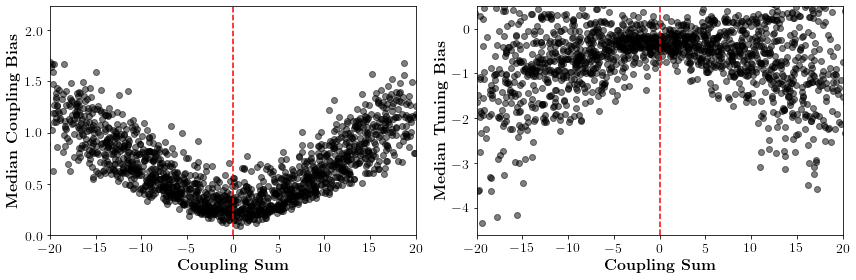

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_sums.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_sums.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0.5)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

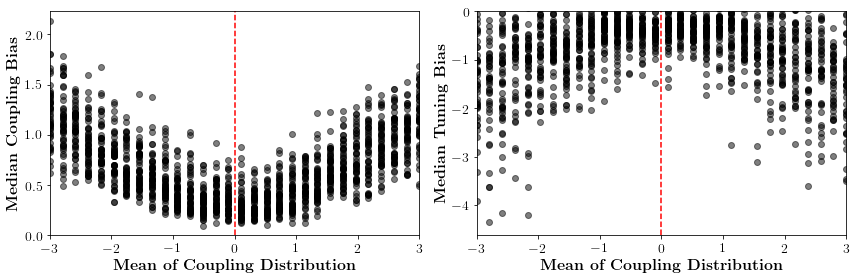

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for model in range(n_models):
    axes[0].scatter(means, a_bias_med[:, model],
                    alpha=0.5,
                    color='black')
    axes[1].scatter(means, b_bias_med[:, model],
                    alpha=0.5,
                    color='black')

for ax in axes:
    ax.set_xlim([-3, 3])
    ax.set_xlabel(r'\textbf{Mean of Coupling Distribution}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

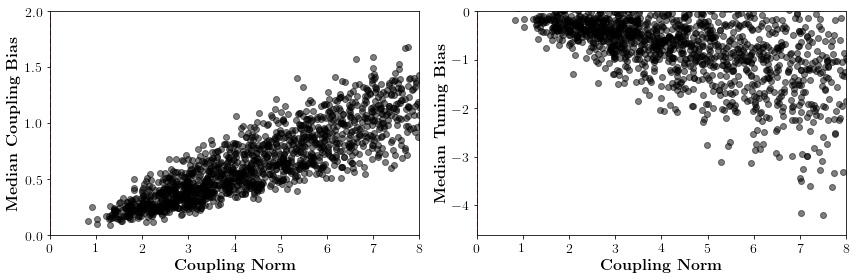

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_norms.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_norms.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([0, 8])
    ax.set_xlabel(r'\textbf{Coupling Norm}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0, top=2)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

(0.0, 10.84821331560347)

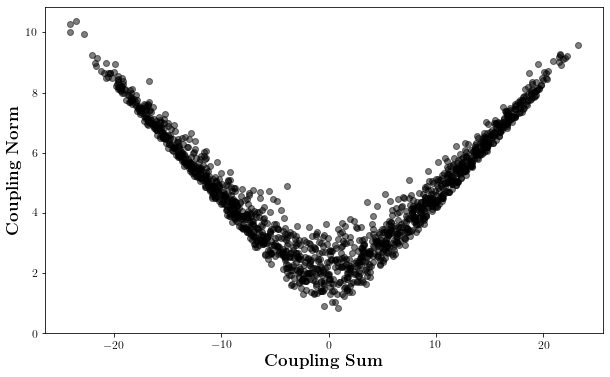

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

ax.scatter(a_sums.ravel(), a_norms.ravel(),
           alpha=0.5,
           color='black')

ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=17)
ax.set_ylabel(r'\textbf{Coupling Norm}', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_ylim(bottom=0)

# Tuning Curve + Symmetric Lognormal

In [23]:
tc_lognormal_path = os.path.join(base_path, 'tc_sweep_tc_symlognormal.npz')

In [24]:
results = np.load(tc_lognormal_path)

In [25]:
a_trues = results['a_trues']
b_trues = results['b_trues']
a_hats = results['a_hats']
b_hats = results['b_hats']

n_nz_a = np.unique(np.count_nonzero(a_trues, axis=-1)).item()
n_nz_b = np.unique(np.count_nonzero(b_trues, axis=-1)).item()
n_means, n_models, n_datasets = a_hats.shape[:-1]

a_trues_nz = np.zeros((n_means, n_models, n_nz_a))
b_trues_nz = np.zeros((n_means, n_models, n_nz_b))
a_bias = np.zeros((n_means, n_models, n_datasets, n_nz_a))
b_bias = np.zeros((n_means, n_models, n_datasets, n_nz_b))
a_bias_norm = np.zeros_like(a_bias)
b_bias_norm = np.zeros_like(b_bias)

for mean_idx in range(n_means):
    for model_idx in range(n_models):
        current_a = a_trues[mean_idx, model_idx]
        current_b = b_trues[mean_idx, model_idx]
        a_trues_nz[mean_idx, model_idx] = current_a[current_a != 0]
        b_trues_nz[mean_idx, model_idx] = current_b[current_b != 0]
        for dataset_idx in range(n_datasets):
            a_bias_temp = \
                a_hats[mean_idx, model_idx, dataset_idx][current_a != 0] - a_trues_nz[mean_idx, model_idx]
            b_bias_temp = \
                b_hats[mean_idx, model_idx, dataset_idx][current_b != 0] - b_trues_nz[mean_idx, model_idx]
            a_bias[mean_idx, model_idx, dataset_idx] = a_bias_temp
            a_bias_norm[mean_idx, model_idx, dataset_idx] = a_bias_temp / np.abs(a_trues_nz[mean_idx, model_idx])
            b_bias[mean_idx, model_idx, dataset_idx] = b_bias_temp
            b_bias_norm[mean_idx, model_idx, dataset_idx] = b_bias_temp / np.abs(b_trues_nz[mean_idx, model_idx])

In [26]:
a_sums = np.sum(a_trues_nz, axis=-1)
a_norms = np.linalg.norm(a_trues_nz, ord=2, axis=-1)
means = np.linspace(-3, 3, 30)

a_bias_med = np.median(np.mean(a_bias, axis=3), axis=2)
b_bias_med = np.median(np.mean(b_bias, axis=3), axis=2)

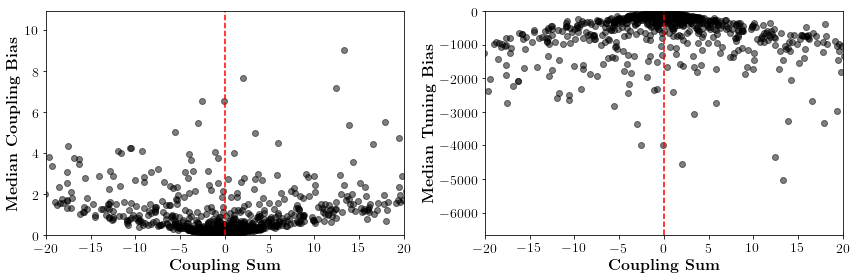

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_sums.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_sums.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0.5)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

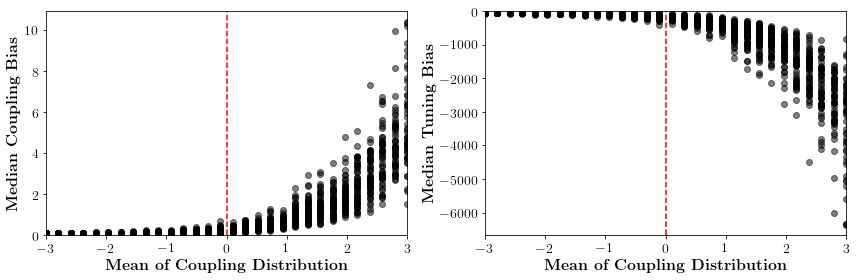

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for model in range(n_models):
    axes[0].scatter(means, a_bias_med[:, model],
                    alpha=0.5,
                    color='black')
    axes[1].scatter(means, b_bias_med[:, model],
                    alpha=0.5,
                    color='black')

for ax in axes:
    ax.set_xlim([-3, 3])
    ax.set_xlabel(r'\textbf{Mean of Coupling Distribution}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

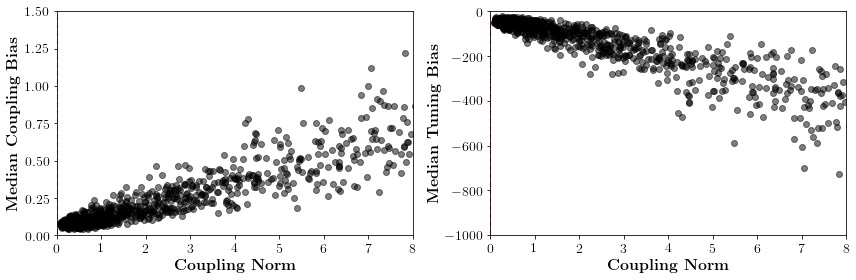

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_norms.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_norms.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([0, 8])
    ax.set_xlabel(r'\textbf{Coupling Norm}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0, top=1.5)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0, bottom=-1000)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

(0.0, 102.08805936345487)

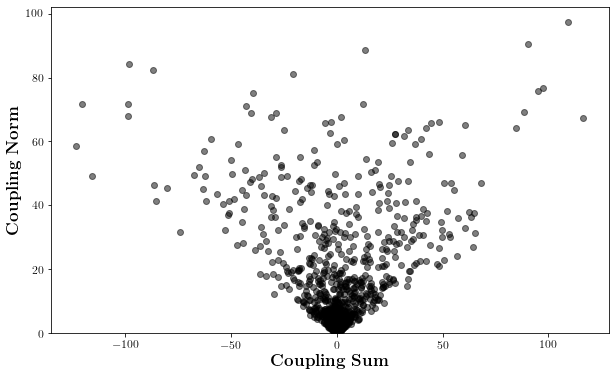

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

ax.scatter(a_sums.ravel(), a_norms.ravel(),
           alpha=0.5,
           color='black')

ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=17)
ax.set_ylabel(r'\textbf{Coupling Norm}', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_ylim(bottom=0)

# Tuning Curves + Gaussian

In [31]:
tc_gaussian_path = os.path.join(base_path, 'tc_sweep_tc_gaussian.npz')

In [32]:
results = np.load(tc_gaussian_path)

In [33]:
a_trues = results['a_trues']
b_trues = results['b_trues']
a_hats = results['a_hats']
b_hats = results['b_hats']

n_nz_a = np.unique(np.count_nonzero(a_trues, axis=-1)).item()
n_nz_b = np.unique(np.count_nonzero(b_trues, axis=-1)).item()
n_means, n_models, n_datasets = a_hats.shape[:-1]

a_trues_nz = np.zeros((n_means, n_models, n_nz_a))
b_trues_nz = np.zeros((n_means, n_models, n_nz_b))
a_bias = np.zeros((n_means, n_models, n_datasets, n_nz_a))
b_bias = np.zeros((n_means, n_models, n_datasets, n_nz_b))
a_bias_norm = np.zeros_like(a_bias)
b_bias_norm = np.zeros_like(b_bias)

for mean_idx in range(n_means):
    for model_idx in range(n_models):
        current_a = a_trues[mean_idx, model_idx]
        current_b = b_trues[mean_idx, model_idx]
        a_trues_nz[mean_idx, model_idx] = current_a[current_a != 0]
        b_trues_nz[mean_idx, model_idx] = current_b[current_b != 0]
        for dataset_idx in range(n_datasets):
            a_bias_temp = \
                a_hats[mean_idx, model_idx, dataset_idx][current_a != 0] - a_trues_nz[mean_idx, model_idx]
            b_bias_temp = \
                b_hats[mean_idx, model_idx, dataset_idx][current_b != 0] - b_trues_nz[mean_idx, model_idx]
            a_bias[mean_idx, model_idx, dataset_idx] = a_bias_temp
            a_bias_norm[mean_idx, model_idx, dataset_idx] = a_bias_temp / np.abs(a_trues_nz[mean_idx, model_idx])
            b_bias[mean_idx, model_idx, dataset_idx] = b_bias_temp
            b_bias_norm[mean_idx, model_idx, dataset_idx] = b_bias_temp / np.abs(b_trues_nz[mean_idx, model_idx])

In [34]:
a_sums = np.sum(a_trues_nz, axis=-1)
a_norms = np.linalg.norm(a_trues_nz, ord=2, axis=-1)
means = np.linspace(-3, 3, 30)

a_bias_med = np.median(np.mean(a_bias, axis=3), axis=2)
b_bias_med = np.median(np.mean(b_bias, axis=3), axis=2)

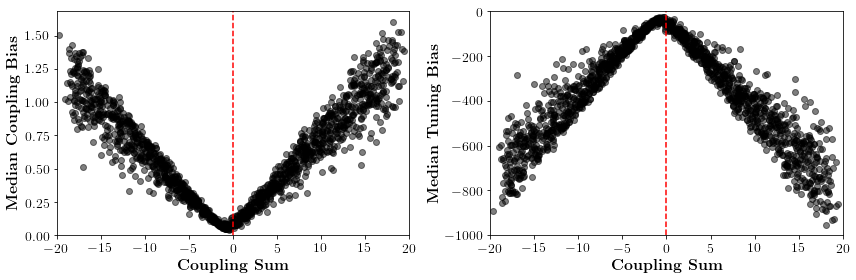

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_sums.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_sums.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0.5)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

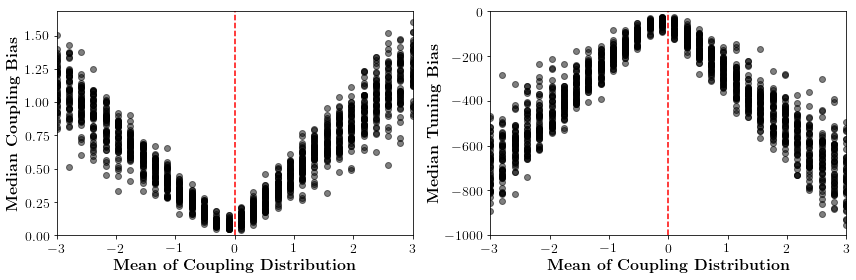

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for model in range(n_models):
    axes[0].scatter(means, a_bias_med[:, model],
                    alpha=0.5,
                    color='black')
    axes[1].scatter(means, b_bias_med[:, model],
                    alpha=0.5,
                    color='black')

for ax in axes:
    ax.set_xlim([-3, 3])
    ax.set_xlabel(r'\textbf{Mean of Coupling Distribution}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

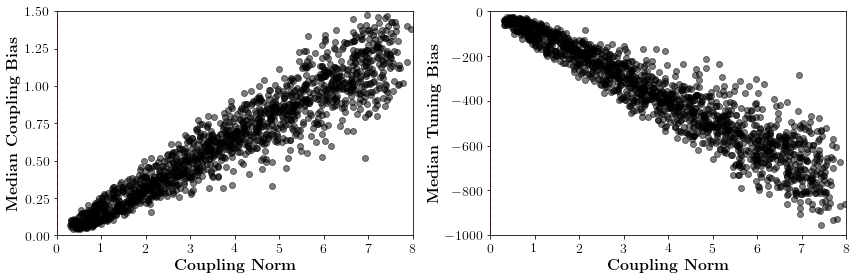

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].scatter(a_norms.ravel(), a_bias_med.ravel(),
                alpha=0.5,
                color='black')
axes[1].scatter(a_norms.ravel(), b_bias_med.ravel(),
                alpha=0.5,
                color='black')

for ax in axes:
    ax.set_xlim([0, 8])
    ax.set_xlabel(r'\textbf{Coupling Norm}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.axvline(0, color='red', linestyle='--')

axes[0].set_ylim(bottom=0, top=1.5)
axes[0].set_ylabel(r'\textbf{Median Coupling Bias}', fontsize=16)
axes[1].set_ylim(top=0, bottom=-1000)
axes[1].set_ylabel(r'\textbf{Median Tuning Bias}', fontsize=16)

plt.tight_layout()

(0.0, 8.463161198606555)

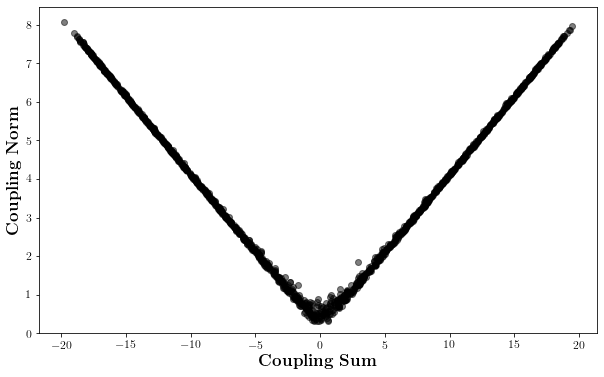

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

ax.scatter(a_sums.ravel(), a_norms.ravel(),
           alpha=0.5,
           color='black')

ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=17)
ax.set_ylabel(r'\textbf{Coupling Norm}', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_ylim(bottom=0)